[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tomclemen/master_ai/blob/main/Chapter04_super%2Bunsuper.ipynb)

# Supervised and Unsupervised Machine Learning

Acknowledgements: Parts of this chapter is based on the SciPy lecture notes part 3.6 (author Gael Varoquaux), http://www.scipy-lectures.org/packages/scikit-learn/index.html

Please install the following Python packages before proceeding:
- sklearn
- matplotlib
- numpy

## Data structures

Machine learning algorithms implemented in scikit-learn expect data to be stored in a two-dimensional array or matrix. The arrays can be either numpy arrays, or in some cases scipy.sparse matrices. The size of the array is expected to be `[n_samples, n_features]`

* n_samples: The number of samples: each sample is an item to process (e.g. classify). A sample can be a document, a picture, a sound, a video, an astronomical object, a row in database or CSV file, or whatever you can describe with a fixed set of quantitative traits.
* n_features: The number of features or distinct traits that can be used to describe each item in a quantitative manner. Features are generally real-valued, but may be boolean or discrete-valued in some cases.  

The number of features must be fixed in advance. However it can be very high dimensional (e.g. millions of features) with most of them being zeros for a given sample. This is a case where `scipy.sparse` matrices can be useful, in that they are much more memory-efficient than numpy arrays.

## The Iris Dataset

As an example of a simple dataset, let us a look at the iris data stored by scikit-learn. Suppose we want to recognize species of irises. The data consists of measurements of three different species of irises:

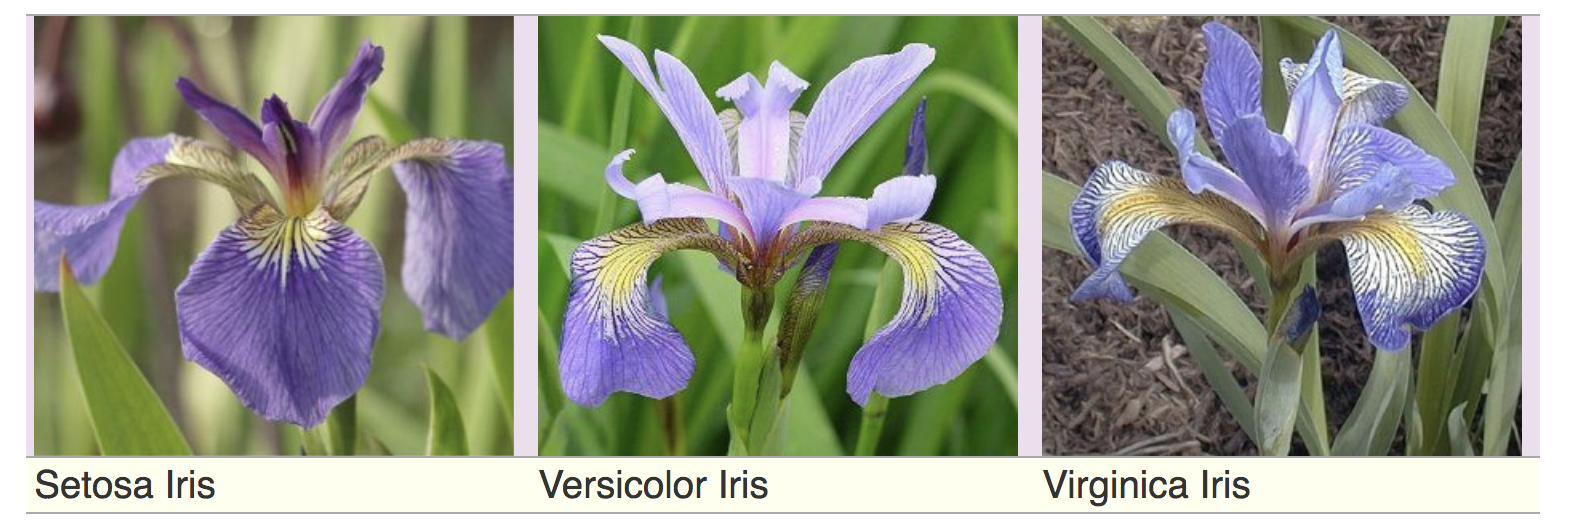


If we want to design an algorithm to recognize iris species, what might the data be?  

Remember: we need a 2D array of size [n_samples x n_features].  

* What would the n_samples refer to?
* What might the n_features refer to?

Remember that there must be a fixed number of features for each sample, and feature number i must be a similar kind of quantity for each sample.

## Loading the Iris Data

Scikit-learn has a very straightforward set of data on these iris species. The data consist of the following:

* Features in the Iris dataset:
    + sepal length (cm), sepal width (cm), petal length (cm), and petal width (cm)  

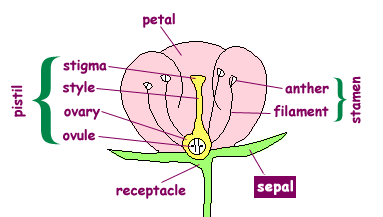
Source: https://extension.illinois.edu/gpe/glossary/sepal.html


* Target classes to predict:
    + Setosa, Versicolour, and Virginica  
    
`scikit-learn` embeds a copy of the iris CSV file along with a function to load it into numpy arrays:

In [103]:
from sklearn.datasets import load_iris
iris = load_iris()

The features of each sample flower are stored in the data attribute of the dataset:

In [104]:
print(iris.data.shape)

n_samples, n_features = iris.data.shape
print(n_samples)

print(n_features)

print(iris.data[0]) # one sample, four features

(150, 4)
150
4
[5.1 3.5 1.4 0.2]


The information about the class of each sample is stored in the target attribute of the dataset:

In [105]:
print(iris.target.shape)

print(iris.target)

(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


The corresponding names of the classes are stored in the last attribute, namely `target_names`:

In [106]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


This data is four-dimensional, but we can visualize two of the dimensions at a time using a scatter plot:

<Figure size 432x288 with 0 Axes>

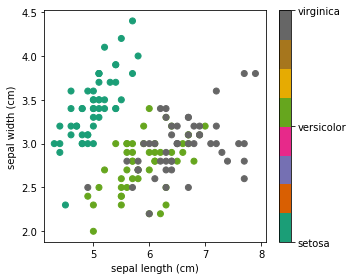

In [107]:
# Load the data
from sklearn.datasets import load_iris
iris = load_iris()

from matplotlib import pyplot as plt
plt.set_cmap('Dark2')

# The indices of the features that we are plotting
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

### Please answer the following questions by referencing to online resources

1. What is the content and the semantic of iris.data and iris.target?
2. Switch the plotting above to 'petal width' and 'petal length' dimensions. What is your observation?

## Supervised Learning: Classification and Regression

In **Supervised Learning**, we have a dataset consisting of both features and labels. The task is to construct an estimator which is able to predict the label of an object given the set of features. A relatively simple example is predicting the species of iris given a set of measurements of its flower. This is a relatively simple task. Some more complicated examples are:

* given a multicolor image of an object through a telescope, determine whether that object is a star, a quasar, or a galaxy.
* given a photograph of a person, identify the person in the photo.
* given a list of movies a person has watched and their personal rating of the movie, recommend a list of movies they would like (So-called recommender systems: a famous example is the Netflix Prize).

What these tasks have in common is that there is one or more unknown quantities associated with the object which needs to be determined from other observed quantities.

Supervised learning is further broken down into two categories, **classification** and **regression**. In classification, the label is discrete, while in regression, the label is continuous. For example, in astronomy, the task of determining whether an object is a star, a galaxy, or a quasar is a classification problem: the label is from three distinct categories. On the other hand, we might wish to estimate the age of an object based on such observations: this would be a regression problem, because the label (age) is a continuous quantity.

## Linear Regressions  

Every algorithm is exposed in scikit-learn via an ‘’Estimator’’ object. For instance a linear regression is: `sklearn.linear_model.LinearRegression`.  

For a detailed introduction of linear regression with Python please visit https://realpython.com/linear-regression-in-python/.

Let’s create a randomized dataset and see what the model brings.

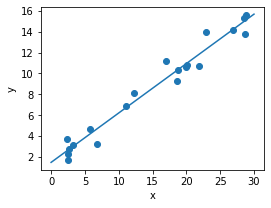

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# x from 0 to 30
x = 30 * np.random.random((20,1))

# y = a*x + b with noise
y = 0.5 * x + 1.0 + np.random.normal(size=x.shape)

# create a linear regression model
model = LinearRegression()
model.fit(x, y)

# predict y from the data
x_new = np.linspace(0, 30, 100)
y_new = model.predict(x_new[:, np.newaxis])

# plot the results
plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.scatter(x, y)
ax.plot(x_new, y_new)

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.axis('tight')

plt.show()

### Please answer the following questions by referencing to online resources

1. How can we quantify the quality of the regression model above? Please add the necessary code lines above and let Python print these values.
2. How does the linear equation behind looks like? Let Python print it for you.
3. What can we do with this model in the aftermath?
4. Why is 'linear regression' part of supervised machine learning?

## Classification by kNN

**Classification**: K nearest neighbors (kNN) is one of the simplest learning strategies: given a new, unknown observation, look up in your reference database which ones have the closest features and assign the predominant class. Let’s try it out on our iris classification problem:

In [109]:
from sklearn import neighbors, datasets
iris = datasets.load_iris()
X, y = iris.data, iris.target
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
# What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
print(iris.target_names[knn.predict([[3, 5, 4, 2]])])

['virginica']


We'd like to plot the decision boundary of nearest neighbor decision on iris, first with a single nearest neighbor, and then using 3 nearest neighbors.

(4.180808080808081, 8.019191919191918, 1.8868686868686868, 4.513131313131313)

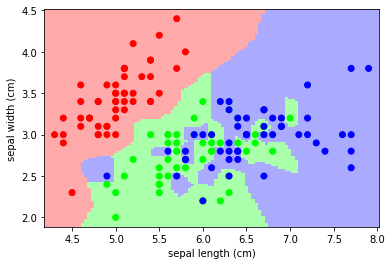

In [110]:
%matplotlib inline  
import numpy as np
from matplotlib import pyplot as plt
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap

# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                    # avoid this ugly slicing by using a two-dim dataset
y = iris.target

knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]) 
#https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ravel.html

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')

We achieve a correspondence map between feature combinations and belonging to a species.

And now, redo the analysis with 3 neighbors.

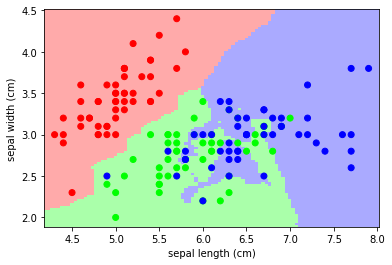

In [111]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')

plt.show()

### Please answer the following questions

1. What are the differences between both results?
2. Find out why the results differ.
3. Which number of neighbors is more suitable?

## Supervised Learning: Classification of Handwritten Digits

### The nature of the data

In this section we’ll apply scikit-learn to the classification of handwritten digits. This will go a bit beyond the iris classification we saw before: we’ll discuss some of the metrics which can be used in evaluating the effectiveness of a classification model.

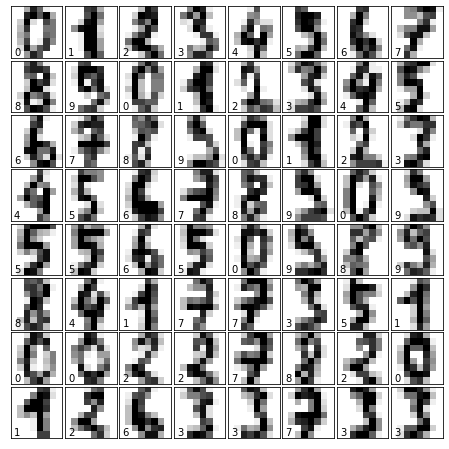

In [112]:
from sklearn.datasets import load_digits
digits = load_digits()
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

### Visualizing the Data on its principal components

A good first-step for many problems is to visualize the data using a *Dimensionality Reduction* technique. We’ll start with the most straightforward one, **Principal Component Analysis (PCA)** https://en.wikipedia.org/wiki/Principal_component_analysis.

PCA seeks orthogonal linear combinations of the features which show the greatest variance, and as such, can help give you a good idea of the structure of the data set. Good examples can be find by https://de.wikipedia.org/wiki/Hauptkomponentenanalyse (in German).

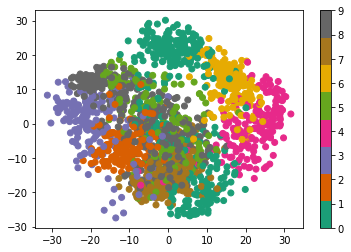

In [113]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
proj = pca.fit_transform(digits.data)
plt.scatter(proj[:, 0], proj[:, 1], c=digits.target) 

plt.colorbar() 

### Quick question

Given these projections of the data, which numbers do you think a classifier might have trouble distinguishing?

## Gaussian Naive Bayes Classification

For most classification problems, it’s nice to have a simple, fast method to provide a quick baseline classification. If the simple and fast method is sufficient, then we don’t have to waste CPU cycles on more complex models. If not, we can use the results of the simple method to give us clues about our data.

One good method to keep in mind is Gaussian Naive Bayes (`sklearn.naive_bayes.GaussianNB`).
See https://en.wikipedia.org/wiki/Naive_Bayes_classifier for more details.

Gaussian Naive Bayes fits a Gaussian distribution to each training label independantly on each feature, and uses this to quickly give a rough classification. It is generally not sufficiently accurate for real-world data, but can perform surprisingly well, for instance on text data.

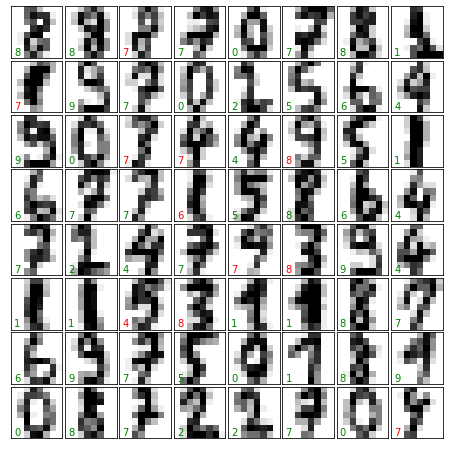

In [114]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

# train the model
clf = GaussianNB()
clf.fit(X_train, y_train)

# use the model to predict the labels of the test data
predicted = clf.predict(X_test)
expected = y_test

# Plot the prediction
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary,
              interpolation='nearest')

    # label the image with the target value
    if predicted[i] == expected[i]:
        ax.text(0, 7, str(predicted[i]), color='green')
    else:
        ax.text(0, 7, str(predicted[i]), color='red')

### Quantify the performance

We’d like to measure the performance of our estimator without having to resort to plotting examples. A simple method might be to simply compare the number of matches:

In [115]:
matches = (predicted == expected)
print(matches.shape)
print(matches.sum())

(450,)
381


Calculate the ration of correct predictions

In [116]:
matches.sum() / float(len(matches))

0.8466666666666667

We see that more than 80% of the 450 predictions match the input. But there are other more sophisticated metrics that can be used to judge the performance of a classifier: several are available in the `sklearn.metrics` submodule. See https://scikit-learn.org/stable/modules/model_evaluation.html for more info.

One of the most useful metrics is the `classification_report`, which combines several measures and prints a table with the results:

In [117]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       0.97      0.79      0.87        43
           2       0.94      0.79      0.86        42
           3       0.92      0.71      0.80        34
           4       0.93      0.77      0.84        52
           5       0.91      0.89      0.90        54
           6       0.86      0.95      0.90        44
           7       0.66      0.98      0.79        48
           8       0.63      0.92      0.75        37
           9       0.88      0.69      0.78        55

    accuracy                           0.85       450
   macro avg       0.87      0.85      0.85       450
weighted avg       0.87      0.85      0.85       450



Another enlightening metric for this sort of multi-label classification is a confusion matrix https://en.wikipedia.org/wiki/Confusion_matrix: it helps us visualize which labels are being interchanged in the classification errors:

In [118]:
print(metrics.confusion_matrix(expected, predicted))

[[41  0  0  0  0  0  0  0  0  0]
 [ 0 34  1  0  0  0  2  1  2  3]
 [ 0  1 33  1  1  0  1  0  5  0]
 [ 0  0  1 24  0  1  1  1  5  1]
 [ 0  0  0  0 40  0  2 10  0  0]
 [ 0  0  0  0  1 48  1  3  0  1]
 [ 0  0  0  0  0  1 42  0  1  0]
 [ 0  0  0  0  0  1  0 47  0  0]
 [ 0  0  0  1  0  1  0  1 34  0]
 [ 0  0  0  0  1  1  0  8  7 38]]


We see here that in particular, the numbers 1, 2, 3, and 9 are often being labeled 8.

### Please answer the following questions
1. Why does the shape of matches is as it is?
2. Debate the classification report and the confusion matrix with your neighbor. Use the figure above (green and red entries) as a supporting tool.
3. Why did we split the data into training and validation sets?

## The eigenfaces example: chaining PCA and SVMs

The goal of this example is to show how an unsupervised method and a supervised one can be chained for better prediction. It starts with a didactic but lengthy way of doing things, and finishes with the idiomatic approach to pipelining in `scikit-learn`.

Here we’ll take a look at a simple facial recognition example. Ideally, we would use a dataset consisting of a subset of the `Labeled Faces` in the `Wild` data http://vis-www.cs.umass.edu/lfw/ that is available with `sklearn.datasets.fetch_lfw_people()`. However, this is a relatively large download (~200MB) so we will do the tutorial on a simpler, less rich dataset. Feel free to explore the LFW dataset.

In [125]:
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()
faces.data.shape

(400, 4096)

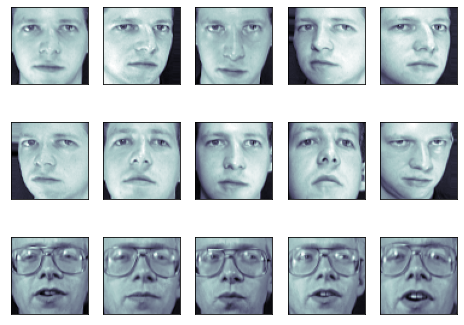

In [126]:
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone)

Note that these faces have already been localized and scaled to a common size. This is an important preprocessing piece for facial recognition, and is a process that can require a large collection of training data. This can be done in `scikit-learn`, but the challenge is gathering a sufficient amount of training data for the algorithm to work. Fortunately, this piece is common enough that it has been done. One good resource is OpenCV, the Open Computer Vision Library https://opencv.org/.

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data,
        faces.target, random_state=0)

print(X_train.shape, X_test.shape)

(300, 4096) (100, 4096)


### Preprocessing: Principal Component Analysis

There are 1850 features covered in this dataset, which is quite a lot for SVM. We can use PCA to reduce these 1850 features to a manageable size, while maintaining most of the information in the dataset.

In [128]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=150, whiten=True)
pca.fit(X_train)

PCA(n_components=150, whiten=True)

One interesting part of PCA is that it computes the “mean” face, which can be interesting to examine:

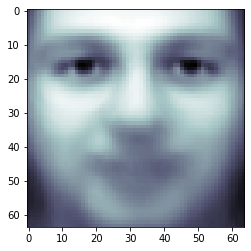

In [129]:
plt.imshow(pca.mean_.reshape(faces.images[0].shape),
           cmap=plt.cm.bone)

The principal components measure deviations about this mean along orthogonal axes.

In [130]:
print(pca.components_.shape)

(150, 4096)


It is also interesting to visualize these principal components:

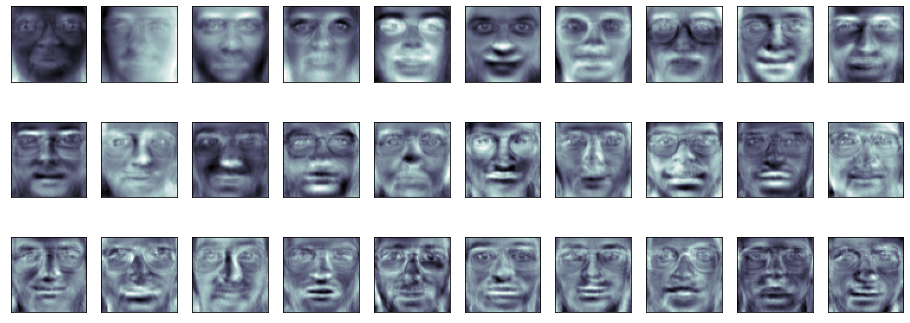

In [131]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)

The components (“eigenfaces”) are ordered by their importance from top-left to bottom-right. We see that the first few components seem to primarily take care of lighting conditions; the remaining components pull out certain identifying features: the nose, eyes, eyebrows, etc.

With this projection computed, we can now project our original training and test data onto the PCA basis:

In [132]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)
print(X_test_pca.shape)

(300, 150)
(100, 150)


These projected components correspond to factors in a linear combination of component images such that the combination approaches the original face.

### Doing the Learning: Support Vector Machines
Now we’ll perform support-vector-machine classification https://en.wikipedia.org/wiki/Support_vector_machine on this reduced dataset:

In [133]:
from sklearn import svm
clf = svm.SVC(C=5., gamma=0.001)
clf.fit(X_train_pca, y_train)

SVC(C=5.0, gamma=0.001)

Finally, we can evaluate how well this classification did. First, we might plot a few of the test-cases with the labels learned from the training set:

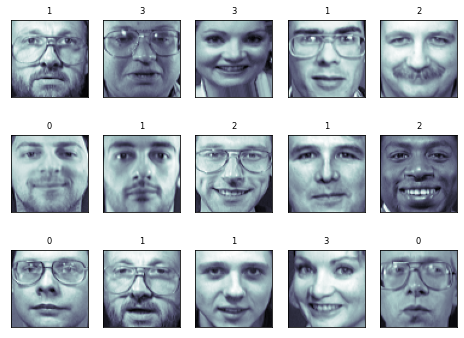

In [134]:
import numpy as np
fig = plt.figure(figsize=(8, 6))
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)
    y_pred = clf.predict(X_test_pca[i, np.newaxis])[0]
    color = ('black' if y_pred == y_test[i] else 'red')
    ax.set_title(faces.target[y_pred],
                 fontsize='small', color=color)

The classifier is correct on an impressive number of images given the simplicity of its learning model! Using a linear classifier on 150 features derived from the pixel-level data, the algorithm correctly identifies a large number of the people in the images.

Again, we can quantify this effectiveness using one of several measures from `sklearn.metrics`. First we can do the classification report, which shows the precision, recall and other measures of the “goodness” of the classification:

In [135]:
from sklearn import metrics
y_pred = clf.predict(X_test_pca)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       1.00      1.00      1.00         4
           2       0.50      1.00      0.67         2
           3       1.00      1.00      1.00         1
           4       0.50      1.00      0.67         1
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      0.67      0.80         3
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         4
          11       0.50      1.00      0.67         1
          12       0.67      1.00      0.80         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         3
          17       1.00      0.83      0.91         6
          19       1.00      1.00      1.00         4
          20       1.00    

And the confusion matrix...

In [136]:
print(metrics.confusion_matrix(y_test, y_pred))

[[4 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 3]]


### Pipelining

Above we used PCA as a pre-processing step before applying our support vector machine classifier. Plugging the output of one estimator directly into the input of a second estimator is a commonly used pattern; for this reason `scikit-learn` provides a `Pipeline` object which automates this process. The above problem can be re-expressed as a pipeline as follows:

In [137]:
from sklearn.pipeline import Pipeline
clf = Pipeline([('pca', decomposition.PCA(n_components=150, whiten=True)),
                ('svm', svm.LinearSVC(C=1.0, max_iter=10000))])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_pred, y_test))

[[2 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 3]]


### Please answer the following questions

1. What - specifically - have we done in the last example?
2. What role did the PCA play? 
3. What is a SVM? And what other examples of utilization you can find?

### If you are interested you might find additional examples and other fancy stuff visiting the following web sites:

- https://scikit-learn.org/stable/
- http://neuralnetworksanddeeplearning.com/index.html
- https://sebastianraschka.com/Articles/2015_pca_in_3_steps.html